# Voyager 2

**DISCLAIMER:** our team did not solve this challenge during the live competition; we first solved it while preparing for this write-up.

## Helpers

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.environ["API_KEY"]
URL_QUERY = "https://%s.crucible.dreadnode.io/score"
URL_FLAG = "https://crucible.dreadnode.io/api/challenges/%s/submit-flag"
CHALLENGE = "voyager2"

def query(flag):
    response = requests.post(
        URL_QUERY % CHALLENGE,
        headers={ "X-API-Key": API_KEY },
        json={ "data": flag }
    )
    return response.json()

def submit(flag):
    response = requests.post(
        URL_FLAG % CHALLENGE,
        headers={ "X-API-Key": API_KEY },
        json={ "challenge": CHALLENGE, "flag": flag }
    )
    return False if response.status_code != 200 else response.json().get("correct")

## Solution

The solution for this challenge is shamelessly taken from the organizers who provided it after the competition was over...

If we look at the mean budget for each spacecraft model we can see that there are six models with slightly larger values.

In [16]:
df = pd.read_parquet("./data/voyager2.parquet")

col_model = "spacecraft_model"
col_budget = "budget_million_usd"

df.groupby(col_model)[col_budget].mean().nlargest(20)

spacecraft_model
Interstellar Wanderer    6387.679596
Starbound Voyager        6384.883321
Starbound Sentinel       6379.669284
Nova Odyssey             6364.526619
Pulsar Nomad             6364.352844
Stellar Horizon          6309.372490
Galactic Phoenix         5217.433458
Stellar Mariner          5188.395042
Galactic Venture         5173.332590
Starlight Cruiser        5154.262275
Starlight Seeker         5124.128953
Cosmic Nomad             5124.045628
Galactic Sentinel        5120.980332
Stellar Nomad II         5109.260583
Celestial Phoenix        5102.375166
Nova Seeker              5097.501942
Quantum Seeker           5087.448723
Cosmic Sentinel          5086.367745
Pulsar Zephyr            5084.942008
Nova Explorer            5077.753161
Name: budget_million_usd, dtype: float64

If we filter the data by these models and plot the mission duration against the budget we can see the flag spelled out.

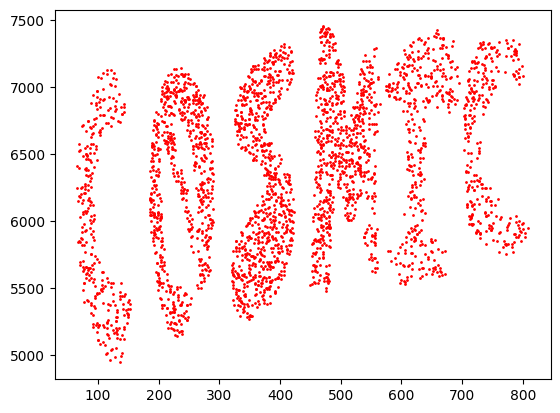

In [18]:
col_duration = "mission_duration_days"

df_filtered = df[
    df[col_model].isin(df.groupby(col_model)[col_budget].mean().nlargest(6).index)
]
plt.scatter(df_filtered[col_duration], df_filtered[col_budget], s=1, c="red")
plt.show()

In [19]:
flag = "C0SMIC"
print("Flag accepted:", submit(query(flag)["flag"]))

Flag accepted: True
